In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7,2023-24
2,2,Luka Doncic,DAL,31.0,36.9,33.4,11.4,23.6,48.4,4.0,...,78.5,0.8,7.5,8.3,9.4,1.4,0.6,4.0,35.1,2023-24
3,3,Shai Gilgeous-Alexander,OKC,30.0,34.7,31.2,11.2,20.6,54.6,1.1,...,91.6,0.8,4.8,5.7,6.3,2.6,0.8,2.0,34.6,2023-24
4,4,Giannis Antetokounmpo,MIL,32.0,34.8,30.9,11.5,18.9,60.6,0.3,...,67.6,2.7,8.6,11.3,5.7,1.3,1.2,3.8,35.6,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,Tristan Thompson,CLE,28.0,11.3,3.3,1.5,2.1,68.3,0.0,...,33.3,1.7,1.9,3.6,0.9,0.2,0.3,0.5,6.4,2023-24
255,255,JT Thor,CHA,25.0,14.8,3.1,1.2,3.2,38.3,0.5,...,42.9,0.8,1.6,2.4,0.4,0.2,0.4,0.2,4.2,2023-24
256,256,Jaxson Hayes,LAL,30.0,10.5,3.0,1.3,1.9,65.5,0.0,...,53.6,0.5,1.4,1.9,0.3,0.2,0.3,0.5,4.2,2023-24
257,257,Andre Jackson Jr.,MIL,27.0,9.7,2.4,0.9,1.7,53.2,0.4,...,75.0,0.8,0.9,1.6,0.9,0.3,0.0,0.5,3.8,2023-24


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       259 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

# Data Cleaning

In [4]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [5]:
# Create a rearranged list 
arrange_columns = ['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,2023-24,Luka Doncic,DAL,31.0,36.9,33.4,11.4,23.6,48.4,4.0,...,8.4,78.5,0.8,7.5,8.3,9.4,1.4,0.6,4.0,35.1
3,2023-24,Shai Gilgeous-Alexander,OKC,30.0,34.7,31.2,11.2,20.6,54.6,1.1,...,8.4,91.6,0.8,4.8,5.7,6.3,2.6,0.8,2.0,34.6
4,2023-24,Giannis Antetokounmpo,MIL,32.0,34.8,30.9,11.5,18.9,60.6,0.3,...,11.3,67.6,2.7,8.6,11.3,5.7,1.3,1.2,3.8,35.6
5,2023-24,De'Aaron Fox,SAC,25.0,35.3,30.0,10.5,21.8,48.3,3.6,...,7.4,72.0,1.0,3.6,4.6,6.1,1.6,0.4,2.6,26.8


In [6]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 258
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    258 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

# Visualization

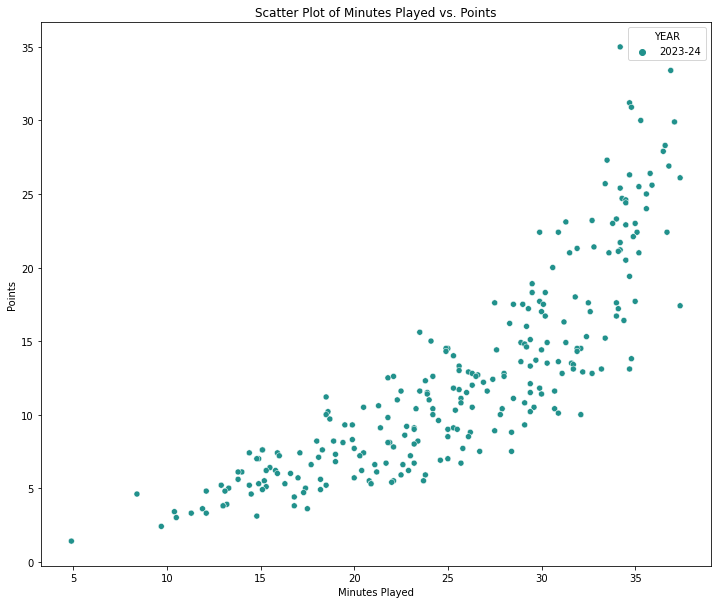

In [7]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [8]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
7,2023-24,Trae Young,ATL,30.0,36.6,28.3,8.8,20.2,43.6,3.6,...,8.3,86.0,0.5,2.5,3.0,11.3,1.4,0.2,4.3,27.4
2,2023-24,Luka Doncic,DAL,31.0,36.9,33.4,11.4,23.6,48.4,4.0,...,8.4,78.5,0.8,7.5,8.3,9.4,1.4,0.6,4.0,35.1
14,2023-24,Nikola Jokic,DEN,34.0,33.4,25.7,9.9,17.8,55.9,1.1,...,5.8,81.8,3.0,9.2,12.3,9.1,1.1,0.9,2.7,37.4
11,2023-24,Devin Booker,PHX,24.0,35.8,26.4,8.9,19.1,46.6,2.0,...,7.5,88.3,0.9,4.4,5.3,7.9,0.8,0.4,2.8,27.0
13,2023-24,Tyrese Maxey,PHI,31.0,37.4,26.1,9.0,19.7,45.8,3.2,...,5.6,87.3,0.5,3.2,3.8,6.5,0.8,0.5,1.5,24.7
3,2023-24,Shai Gilgeous-Alexander,OKC,30.0,34.7,31.2,11.2,20.6,54.6,1.1,...,8.4,91.6,0.8,4.8,5.7,6.3,2.6,0.8,2.0,34.6
15,2023-24,Jalen Brunson,NYK,33.0,35.9,25.6,9.0,19.4,46.3,2.8,...,5.9,82.0,0.7,3.3,4.0,6.2,1.1,0.2,2.4,23.2
5,2023-24,De'Aaron Fox,SAC,25.0,35.3,30.0,10.5,21.8,48.3,3.6,...,7.4,72.0,1.0,3.6,4.6,6.1,1.6,0.4,2.6,26.8
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
6,2023-24,Kevin Durant,PHX,28.0,37.1,29.9,10.4,19.7,52.5,2.2,...,8.0,87.4,0.4,5.9,6.3,6.0,0.9,1.1,3.4,30.4


In [9]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] >= 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
14,2023-24,Nikola Jokic,DEN,34.0,33.4,25.7,9.9,17.8,55.9,1.1,...,5.8,81.8,3.0,9.2,12.3,9.1,1.1,0.9,2.7,37.4
18,2023-24,Anthony Davis,LAL,32.0,35.6,25.0,9.5,17.2,55.1,0.4,...,7.1,80.6,3.3,9.0,12.3,3.3,1.2,2.6,2.0,33.3
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
4,2023-24,Giannis Antetokounmpo,MIL,32.0,34.8,30.9,11.5,18.9,60.6,0.3,...,11.3,67.6,2.7,8.6,11.3,5.7,1.3,1.2,3.8,35.6
22,2023-24,Julius Randle,NYK,33.0,35.6,24.0,8.7,18.3,47.4,1.4,...,6.9,76.3,2.2,7.4,9.6,4.7,0.5,0.2,3.4,24.4
24,2023-24,Lauri Markkanen,UTA,24.0,32.7,23.2,8.0,16.3,48.7,3.2,...,4.8,86.1,2.3,6.2,8.5,1.6,1.0,0.6,1.2,24.7
10,2023-24,Jayson Tatum,BOS,30.0,36.8,26.9,9.3,19.6,47.4,3.0,...,6.7,80.6,0.9,7.5,8.4,4.4,1.0,0.5,2.9,26.8
2,2023-24,Luka Doncic,DAL,31.0,36.9,33.4,11.4,23.6,48.4,4.0,...,8.4,78.5,0.8,7.5,8.3,9.4,1.4,0.6,4.0,35.1
17,2023-24,LeBron James,LAL,31.0,34.2,25.4,9.4,17.6,53.5,2.3,...,5.8,74.9,0.9,6.5,7.4,7.4,1.4,0.7,3.3,29.4
6,2023-24,Kevin Durant,PHX,28.0,37.1,29.9,10.4,19.7,52.5,2.2,...,8.0,87.4,0.4,5.9,6.3,6.0,0.9,1.1,3.4,30.4


In [10]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,YEAR,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,2023-24,Joel Embiid,PHI,25.0,34.2,35.0,11.8,21.8,54.0,1.1,...,11.6,89.3,2.8,8.9,11.7,6.0,1.2,2.0,3.8,40.7
2,2023-24,Luka Doncic,DAL,31.0,36.9,33.4,11.4,23.6,48.4,4.0,...,8.4,78.5,0.8,7.5,8.3,9.4,1.4,0.6,4.0,35.1
3,2023-24,Shai Gilgeous-Alexander,OKC,30.0,34.7,31.2,11.2,20.6,54.6,1.1,...,8.4,91.6,0.8,4.8,5.7,6.3,2.6,0.8,2.0,34.6
4,2023-24,Giannis Antetokounmpo,MIL,32.0,34.8,30.9,11.5,18.9,60.6,0.3,...,11.3,67.6,2.7,8.6,11.3,5.7,1.3,1.2,3.8,35.6
5,2023-24,De'Aaron Fox,SAC,25.0,35.3,30.0,10.5,21.8,48.3,3.6,...,7.4,72.0,1.0,3.6,4.6,6.1,1.6,0.4,2.6,26.8
6,2023-24,Kevin Durant,PHX,28.0,37.1,29.9,10.4,19.7,52.5,2.2,...,8.0,87.4,0.4,5.9,6.3,6.0,0.9,1.1,3.4,30.4
7,2023-24,Trae Young,ATL,30.0,36.6,28.3,8.8,20.2,43.6,3.6,...,8.3,86.0,0.5,2.5,3.0,11.3,1.4,0.2,4.3,27.4
8,2023-24,Donovan Mitchell,CLE,24.0,36.5,27.9,9.8,21.3,45.7,3.1,...,6.0,89.5,1.1,4.6,5.7,5.7,1.9,0.5,2.6,26.8
9,2023-24,Stephen Curry,GSW,30.0,33.5,27.3,8.6,19.0,45.3,4.7,...,5.8,93.1,0.5,3.9,4.4,4.5,0.7,0.4,3.1,23.5
10,2023-24,Jayson Tatum,BOS,30.0,36.8,26.9,9.3,19.6,47.4,3.0,...,6.7,80.6,0.9,7.5,8.4,4.4,1.0,0.5,2.9,26.8


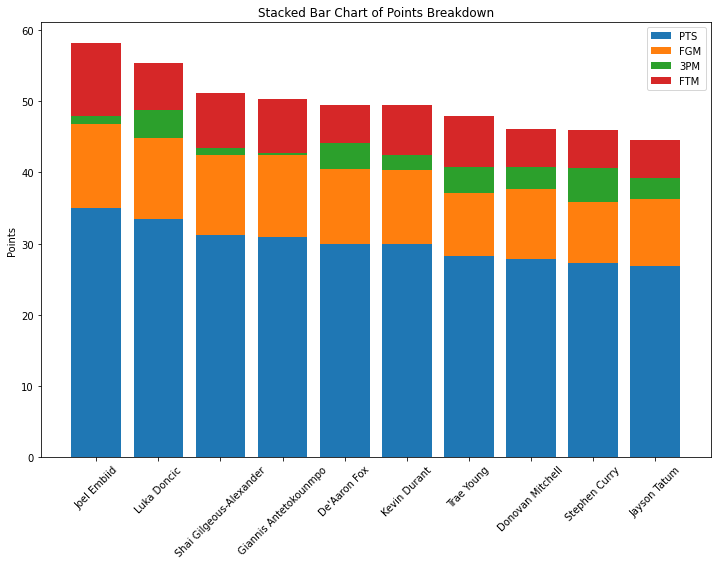

In [11]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [12]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [13]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
1               Joel Embiid  2023-24  34.2  35.0  11.7
4     Giannis Antetokounmpo  2023-24  34.8  30.9  11.3
10             Jayson Tatum  2023-24  36.8  26.9   8.4
2               Luka Doncic  2023-24  36.9  33.4   8.3
6              Kevin Durant  2023-24  37.1  29.9   6.3
3   Shai Gilgeous-Alexander  2023-24  34.7  31.2   5.7
8          Donovan Mitchell  2023-24  36.5  27.9   5.7
11             Devin Booker  2023-24  35.8  26.4   5.3
5              De'Aaron Fox  2023-24  35.3  30.0   4.6
9             Stephen Curry  2023-24  33.5  27.3   4.4


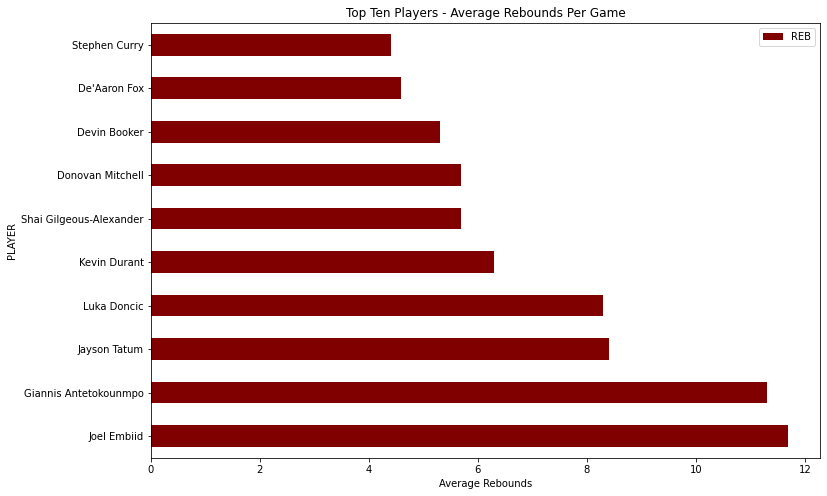

In [14]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 1 to 258
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    258 non-null    object 
 1   PLAYER  258 non-null    object 
 2   TEAM    258 non-null    object 
 3   GP      258 non-null    float64
 4   MIN     258 non-null    float64
 5   PTS     258 non-null    float64
 6   FGM     258 non-null    float64
 7   FGA     258 non-null    float64
 8   FG%     258 non-null    float64
 9   3PM     258 non-null    float64
 10  3PA     258 non-null    float64
 11  3P%     258 non-null    float64
 12  FTM     258 non-null    float64
 13  FTA     258 non-null    float64
 14  FT%     258 non-null    float64
 15  OREB    258 non-null    float64
 16  DREB    258 non-null    float64
 17  REB     258 non-null    float64
 18  AST     258 non-null    float64
 19  STL     258 non-null    float64
 20  BLK     258 non-null    float64
 21  TOV     258 non-null    float64
 22  EF

In [16]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)

# Machine Learning


In [17]:
df.columns

Index(['YEAR', 'PLAYER', 'TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'EFF'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

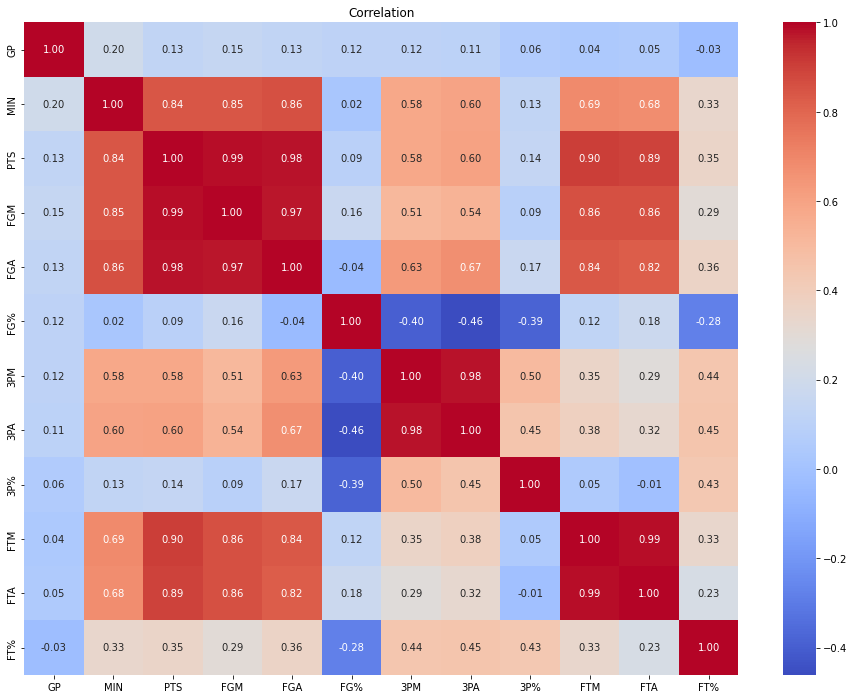

In [18]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


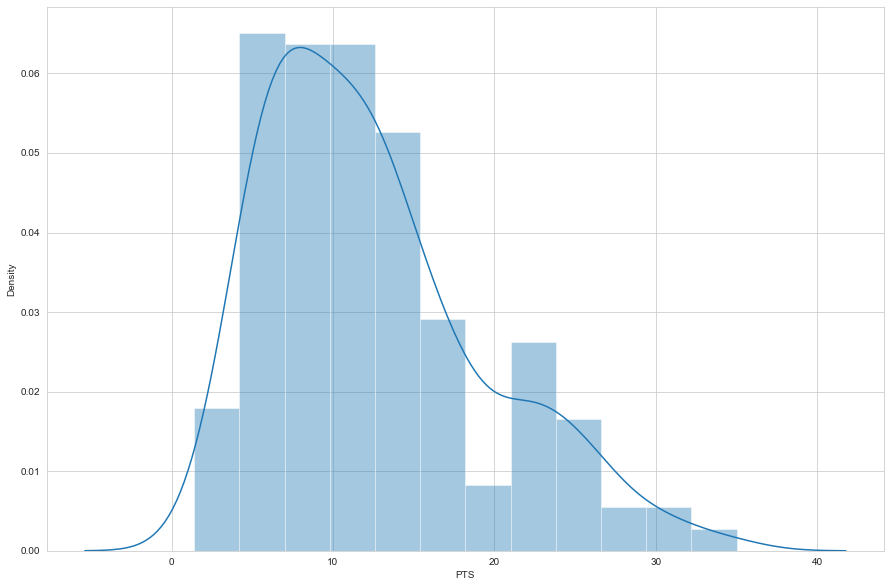

In [19]:
# Distribution of the values in the Points column
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
sns.distplot(df['PTS'])
plt.show()